#IMPORTING LIBRARIES

In [0]:
from matplotlib import pyplot as plt
import numpy as np

#PHASE PORTRAIT

##Normal Form of Fold Bifurcation

In [0]:
def fungsi(x):
    """
    Return the function of model 1D.
    
    Example:
    If function of the model is f(x) = 3 - x^2, 
    then this Function will return 3 - x^2.
    """
    # return miu - x**2 # fold normal
    return r*x*(1 - x/K) - H # model fold

def rungekutta(x):
    """
    Return additional integration runge-kutta 4th order method.
    
    Example:
    From formula runge-kutta 4th for autonomous system
    k1 = f(x)
    k2 = f(x + k1*h/2)
    k3 = f(x + k2*h/2)
    k4 = f(x + k3*h)
    x_{i+1} = x_{i} + (k1 + 2*k2 + 2*k3 + k4) * h / 6
    then this Function ONLY return the (k1 + 2*k2 + 2*k3 + k4) * h / 6 term.
    """
    k1 = fungsi(x)
    k2 = fungsi(x + k1*h/2)
    k3 = fungsi(x + k2*h/2)
    k4 = fungsi(x + k3*h)
    xplus = (k1 + 2*k2 + 2*k3 + k4) * h / 6

    return xplus

In [0]:
def plot_phase_portrait():
    """
    Return phase portrait from system for continuation a single paramater,
    as time on x-axis and numerical solution on y-axis.
    """
    for i in range(len(nilai_awal)):
        x = nilai_awal[i]
        xresult = [x]
        
        for t in range(10):
            xplus = rungekutta(x)    
            nextx = x + xplus
            x = nextx
            
            xresult.append(x)
        
        t = list(range(11))
        if miu > 0:
            xstable = len(xresult) * [1]
            xunstable = len(xresult) * [-1]
            plt.plot(t, xstable, 'g--')
            plt.plot(t, xunstable, 'r--')
            
        elif miu == 0:
            xc = len(xresult) * [0]
            plt.plot(t, xc, 'r--')
            
        plt.plot(t, xresult, color = '#2F2F28')
        
    plt.axis([0, 5, -5, 5])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title(r"$\mu = $" + str(miu))

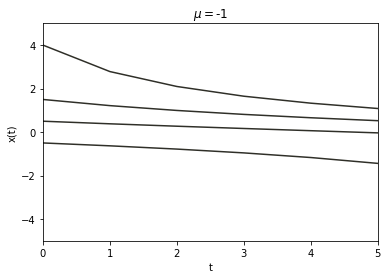

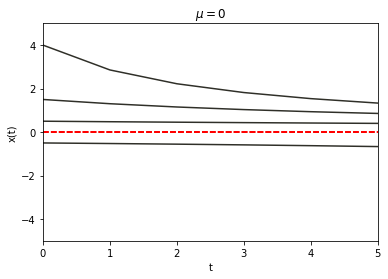

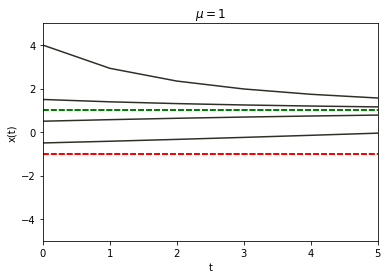

In [18]:
h = 0.1
mius = [-1, 0, 1]
nilai_awal = [-0.5, 0.5, 1.5, 4]


for i in range(len(mius)):
    #fig.add_subplot(1, len(alphas), i + 1)
    miu = mius[i]
    plot_phase_portrait()
    #plt.savefig('potretfase_model_' + str(i+1) +'.png', dpi=300)
    #plt.close(fig)
    plt.show()

##A Single Growth Population Model of Fold Bifurcation

In [0]:
def plot_phase_portrait_model():
    """
    Return phase portrait from system for continuation a single paramater,
    as time on x-axis and numerical solution on y-axis.
    """
    for i in range(len(nilai_awal)):
        x = nilai_awal[i]
        xresult = [x]
        
        for t in range(300):
            xplus = rungekutta(x)    
            nextx = x + xplus
            x = nextx
            
            xresult.append(x)
        
        t = list(range(301))

        if H < Hc:
            NL = len(xresult) * [K / 2 - np.sqrt(K**2 - 4*H*K/r)/2]
            NR = len(xresult) * [K / 2 + np.sqrt(K**2 - 4*H*K/r)/2]
            plt.plot(t, NL, 'r--')
            plt.plot(t, NR, 'g--')

        elif H == Hc:
            Kper2 = len(xresult) * [K / 2]
            plt.plot(t, Kper2, 'b--')

        plt.plot(t, xresult, color = 'black')

    plt.xlabel('year')
    plt.ylabel('population of sandhill cranes')
    plt.title('H = ' + str(H))
    # plt.legend(loc='upper right')
    # plt.savefig('myimage.png', dpi=300)
    plt.show()


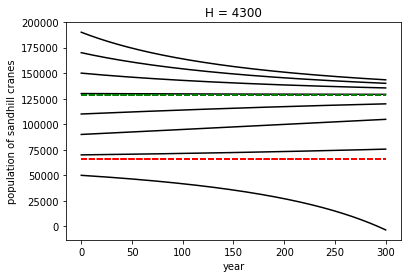

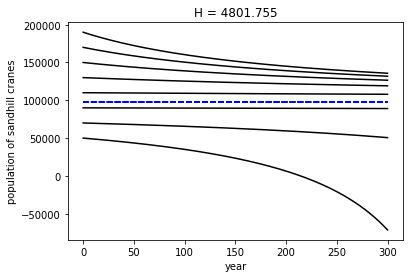

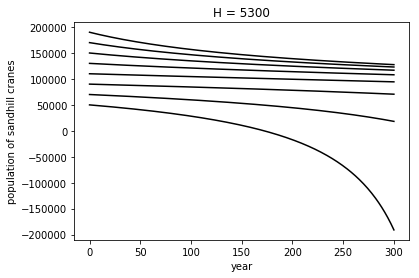

In [31]:
# population of sandhill cranes

h = 0.1
r = 0.0987 # intrinsic growth rate
K = 194600 # carrying capacity
Hc = r*K/4 # critical point
Harvest_Rate = [4300, Hc, 5300]
nilai_awal = [50000 + num*10000 for num in range(0, 15, 2)]

for i in range(len(Harvest_Rate)):
    # fig.add_subplot(1, len(alphas), i + 1)
    H = Harvest_Rate[i]
    plot_phase_portrait_model()
    # plt.savefig('potretfase_model_' + str(i+1) +'.png', dpi=300)
    # plt.close(fig)
    plt.show()

#BIFURCATION DIAGRAM


##Normal Form of Fold Bifurcation

Text(7, 4, '')

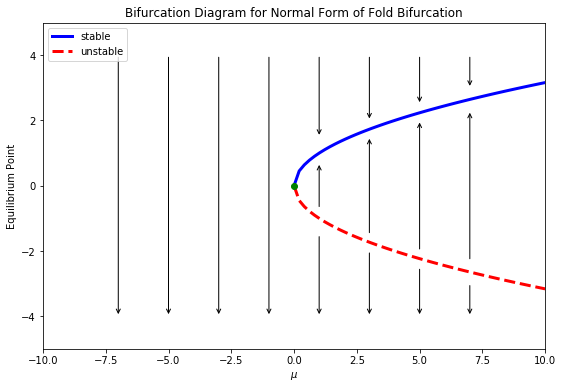

In [37]:
# prepare plot
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1, 1, 1)

# stable equilibrium
def xeq1(r):
    return np.sqrt(r)

# unstable equilibrium
def xeq2(r):
    return -np.sqrt(r)

domain = np.linspace(0, 10)
ax1.plot(domain, xeq1(domain), 'b-', label = 'stable', linewidth = 3)
ax1.plot(domain, xeq2(domain), 'r--', label = 'unstable', linewidth = 3)
ax1.legend(loc='upper left')

#neutral equilibrium point
ax1.plot([0], [0], 'go')
ax1.axis([-10, 10, -5, 5])
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel('Equilibrium Point')
ax1.set_title('Bifurcation Diagram for Normal Form of Fold Bifurcation')

#black arrows indicating the attracting dynamics of the stable and the repelling dynamics of the unstable equilibrium point: 
ax1.annotate('', xy=(-7, -4), xytext=(-7, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(-5, -4), xytext=(-5, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(-3, -4), xytext=(-3, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(-1, -4), xytext=(-1, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(1, -4), xytext=(1, -1.5), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(1, 0.7), xytext=(1, -0.7), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(1, 1.5), xytext=(1, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(3, -4), xytext=(3, -2), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(3, 1.5), xytext=(3, -1.5), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(3, 2), xytext=(3, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(5, -4), xytext=(5, -2.5), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(5, 2), xytext=(5, -2), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(5, 2.5), xytext=(5, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(7, -4), xytext=(7, -3), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(7, 2.3), xytext=(7, -2.3), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(7, 3), xytext=(7, 4), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

##Model of Fold Bifurcation

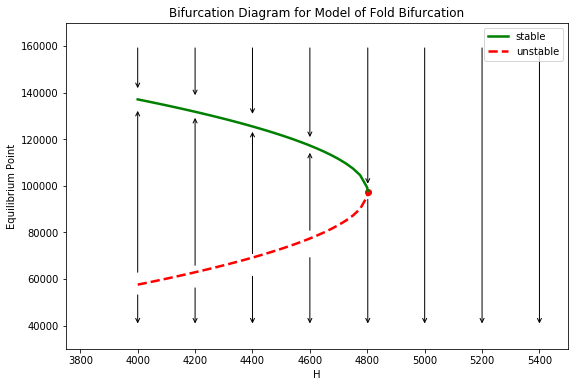

In [39]:
# model fold

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1, 1, 1)

r = 0.0987 # intrinsic growth rate
K = 194600 # carrying capacity
Hc = r*K/4
Harvest_Rate = [4000 + num*25 for num in range(33)] + [Hc]
nilai_awal = [50000 + num*10000 for num in range(0, 15, 2)]

xstabil = []
xtidakstabil = []

for hs in Harvest_Rate:
    H = hs
    x_stable = K / 2 + np.sqrt(K**2 - 4*H*K/r)/2
    x_unstable = K / 2 - np.sqrt(K**2 - 4*H*K/r)/2
    xstabil.append(x_stable)
    xtidakstabil.append(x_unstable)

plt.plot([4801.755], [97300], 'ro')
plt.title('Bifurcation Diagram for Model of Fold Bifurcation')
plt.xlabel('H')
plt.ylabel('Equilibrium Point')
plt.plot(Harvest_Rate, xstabil, 'g-', label = 'stable', linewidth = 2.5)
plt.plot(Harvest_Rate, xtidakstabil, 'r--', label = 'unstable', linewidth = 2.5)
plt.legend(loc = 'upper right')
# plt.savefig('diagrambifurkasifold.png', dpi=300)

ax1.axis([3750, 5500, 30000, 170000])
ax1.annotate('', xy=(4000, 133000), xytext=(4000, 62000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4000, 141000), xytext=(4000, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4000, 40000), xytext=(4000, 54000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

ax1.annotate('', xy=(4200, 130000), xytext=(4200, 65000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4200, 138000), xytext=(4200, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4200, 40000), xytext=(4200, 57000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

ax1.annotate('', xy=(4400, 124000), xytext=(4400, 70000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4400, 130000), xytext=(4400, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4400, 40000), xytext=(4400, 62000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

ax1.annotate('', xy=(4600, 115000), xytext=(4600, 80000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4600, 120000), xytext=(4600, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(4600, 40000), xytext=(4600, 70000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

ax1.annotate('', xy=(Hc, 100000), xytext=(Hc, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(Hc, 40000), xytext=(Hc, 95000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)

ax1.annotate('', xy=(5000, 40000), xytext=(5000, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(5200, 40000), xytext=(5200, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
ax1.annotate('', xy=(5400, 40000), xytext=(5400, 160000), arrowprops=dict(arrowstyle="->",connectionstyle="arc3",lw=1),)
plt.show()
